## TinyML, Chapter 4

In [ ]:
# Install TensorFLow
# !pip install tensorflow==2.6.4
#
import tensorflow as tf
#
import numpy as np
#
import matplotlib.pyplot as plt
#
import math
import time
#

In [101]:
print("TensorFlow version", tf.__version__)

TensorFlow version 2.2.0


## Generating sample data

In [ ]:
# Generate sample datapoints
SAMPLES = 1000
SEED = 1337

In [ ]:
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2n, wich covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

In [ ]:
# Shuffle the values to garantee they're not in order
np.random.shuffle(x_values)

In [ ]:
# Calculate the corresponding sine values
y_values = np.sin(x_values)

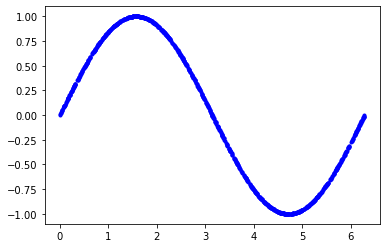

In [107]:
# Plot the data, with blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

In [ ]:
# Add small randomness...
y_values += 0.1 * np.random.randn(*y_values.shape)

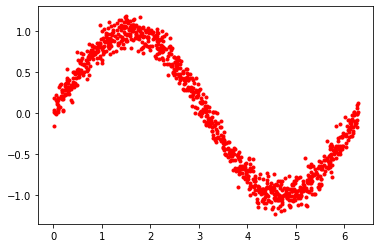

In [109]:
# Re-plot (4-10)
plt.plot(x_values, y_values, 'r.')
plt.show()

In [ ]:
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int((0.2 * SAMPLES) + TRAIN_SPLIT)

In [111]:
print(TEST_SPLIT)

800


In [ ]:
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

In [113]:
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
#
print("Train     : {} element(s)".format(x_train.size))
print("Validation: {} element(s)".format(x_validate.size))
print("Test      : {} element(s)".format(x_test.size))

Train     : 600 element(s)
Validation: 200 element(s)
Test      : 200 element(s)


Plot each data in a different color

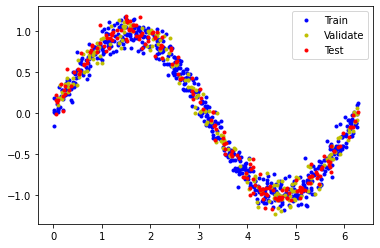

In [114]:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

### Now defining a Basic Model

In [115]:
# Using Keras
# import tensorflow as tf
print("Reminder TF version:", tf.__version__)
#
from tensorflow.keras import layers
# from tensorflow import keras
print("Keras version:", tf.keras.__version__)
# from keras import layers
model_1 = tf.keras.models.Sequential(name="FirstModel")
#

Reminder TF version: 2.2.0
Keras version: 2.3.0-tf


##### First layer takes a scalar input and feeds it into 16 neurons.
Activation is based on **relu** activation function.

Nice Activation Functions summary [here](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions).

In [ ]:
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

Final layer is a single neuron using a standard optimizer and loss function for regression

In [ ]:
model_1.add(layers.Dense(1))

In [118]:
# Compile
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Print model's architecture
model_1.summary()
#

Model: "FirstModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [119]:
verb = 0 # 1 is the default. Verbose option takes time.
before = time.time()
history_1 = model_1.fit(x_train, y_train, verbose=verb, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))
after = time.time()
print("Model fit executed in {:.3f} seconds".format(after - before))


Model fit executed in 73.876 seconds


### Graphing the History

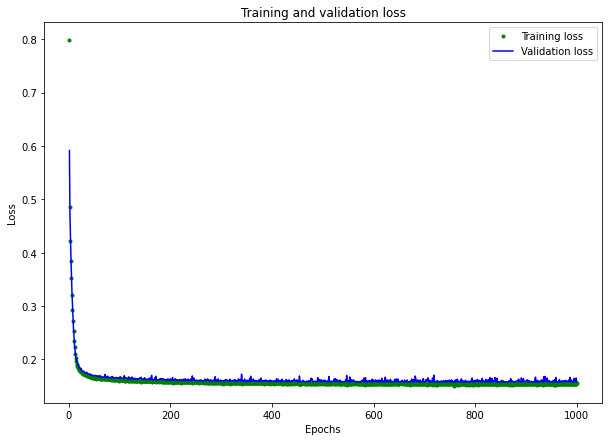

In [120]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 7)) # Optional, but can be useful
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Skipping values

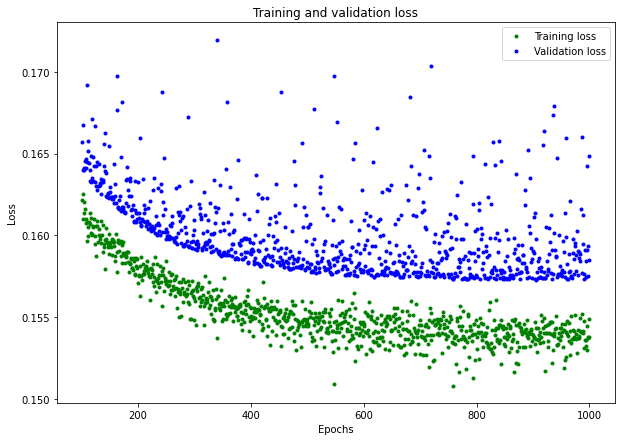

In [121]:
# Exclude the first few epochs to have a graph easier to read
SKIP = 100

plt.figure(figsize=(10, 7)) # Optional, but can be useful
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Draw graph for Mean Absolute Error (mae)

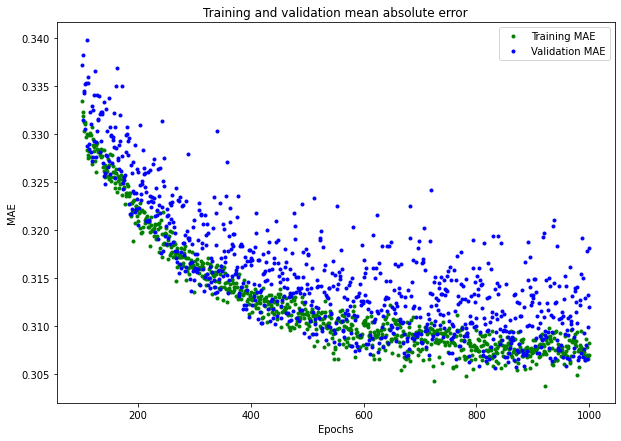

In [122]:
# Another way of measuring the error in the prediction
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.figure(figsize=(10, 7)) # Optional, but can be useful
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

### Apply model: Prediction

In [ ]:
# Use the model, predictions from our validation data
predictions = model_1.predict(x_train)

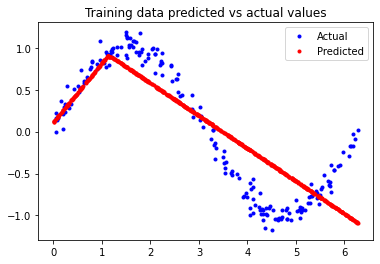

In [124]:
# Plot predictions along with test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

Sounds like the model is not big enough...

Let's add a second layer

In [125]:
model_2 = tf.keras.models.Sequential(name="SecondModel")
#
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# A second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))
# Same last layer
model_2.add(layers.Dense(1))
# Compile
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Print model's architecture
model_2.summary()
#

Model: "SecondModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [126]:
# Train again
verb = 0
before = time.time()
history_2 = model_2.fit(x_train, y_train, verbose=verb, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))
after = time.time()
print("Training of {} executed in {:.3f} seconds".format(model_2.name, (after - before)))


Training of SecondModel executed in 77.130 seconds


## Plot the data, see if there is any change

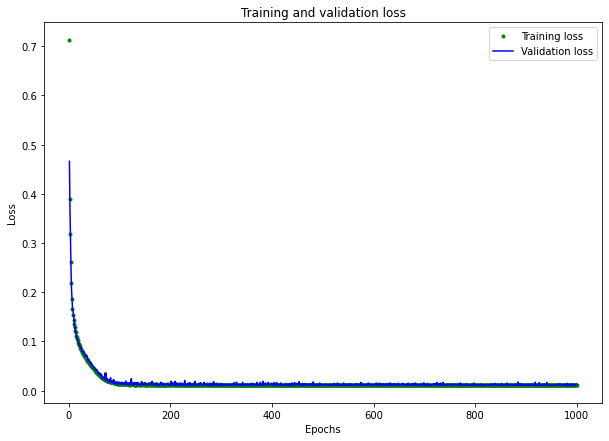

In [127]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 7)) # Optional, but can be useful
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


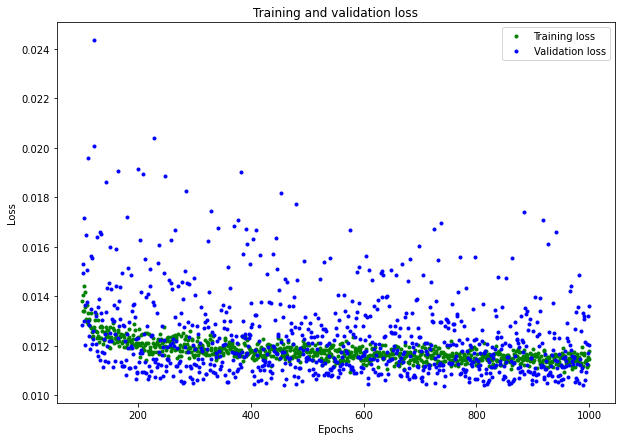

In [128]:
# Exclude the first few epochs to have a graph easier to read
SKIP = 100

plt.figure(figsize=(10, 7)) # Optional, but can be useful
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

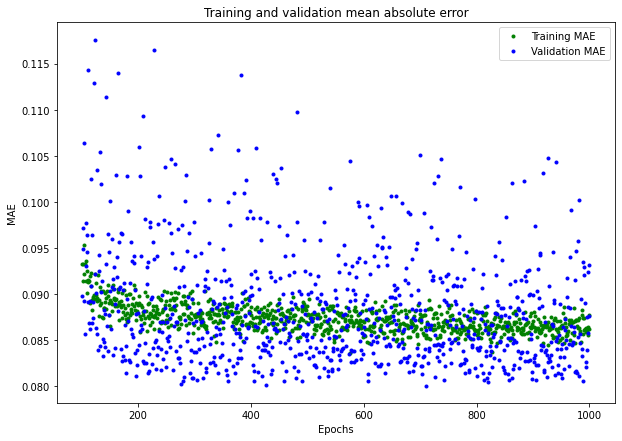

In [129]:
# Another way of measuring the error in the prediction
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.figure(figsize=(10, 7)) # Optional, but can be useful
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

### Now re-testing

7/7 [==============================] - 0s 2ms/step - loss: 0.0091 - mae: 0.0757


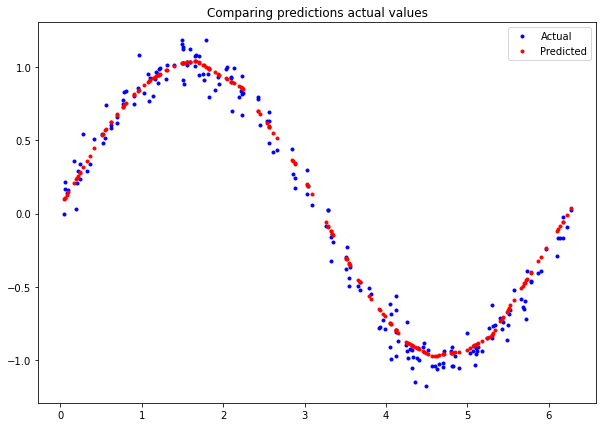

In [130]:
loss = model_2.evaluate(x_test, y_test)
# Use the model, predictions from our test dataset
predictions = model_2.predict(x_test)

plt.figure(figsize=(10, 7)) # Optional, but can be useful
# Plot predictions along with test data
plt.clf()
plt.title('Comparing predictions actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

Much better!

## Converting for TensorFlow Lite, and storing the model

In [131]:
# Convert the model to TensorFlow Lite format - without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save to disk
open("sine_model.tflite", "wb").write(tflite_model)


2540

In [132]:
# Convert the model to TensorFlow Lite format - with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# define generator function
def representative_dataset_generator():
  for value in x_test:
    # Each scalar value must be inside a 2D arraythat is wrapped in the list
    yield [np.array(value, dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset_generator
# Conversion here
tflite_model = converter.convert()

# And finally save to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)


2560

### Predict from the store models

In [ ]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate required memory
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of input nd output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
#
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

# Create array to store results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each interpreter for each test value and store it in their dedicated array
for x_value in x_test:
  # Create 2D sensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
  # Write value to input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # Run inference
  sine_model.invoke()
  # Read output, and store it
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])
  # Same for the other model
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])


#### Plot results for the 2 models

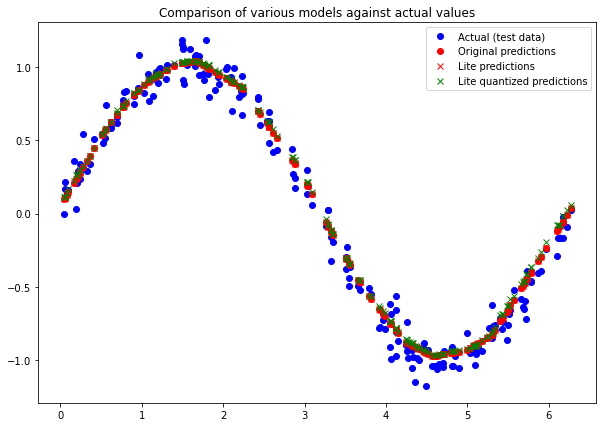

In [134]:
plt.figure(figsize=(10, 7)) # Optional, but can be useful
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual (test data)')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'rx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')
#
plt.legend()
plt.show()

#### Model size comparison

In [135]:
import os

basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes big" % basic_model_size)

quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes big" % quantized_model_size)

difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)


Basic model is 2540 bytes big
Quantized model is 2560 bytes big
Difference is -20 bytes


### Converting to a C file

In [136]:
# Install xxd if not there yet (should be there on a Mac, comment the line)
!apt-get -qq install xxd
# Save the file (the model) as a C file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# Display the file's content
!cat sine_model_quantized.cc


Selecting previously unselected package xxd.
(Reading database ... 144439 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.3_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.3) ...
Setting up xxd (2:8.0.1453-1ubuntu1.3) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char sine_model_quantized_tflite[] = {
  0x14, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x42, 0xfd, 0xff, 0xff,
  0x03, 0x00, 0x00, 0x00, 0x98, 0x09, 0x00, 0x00, 0xa8, 0x02, 0x00, 0x00,
  0x90, 0x02, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x0b, 0x00, 0x00, 0x00,
  0x7c, 0x02, 0x00, 0x00, 0x68, 0x02, 0x00, 0x00, 0x0c, 0x02, 0x00, 0x00,
  0xa8, 0x01, 0x00, 0x00, 0x94, 0x01, 0x00, 0x00, 0x70, 0x01, 0x00, 0x00,
  0x5c, 0x00, 0x00, 0x00, 0x38, 0x00, 0x00, 0x00, 0x2c, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x0c, 0xfd, 0xff, 0xff,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00,

### Done!